In [3]:
import pandas as pd

sales = pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')
sales.head(5)

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


# Exploring the Data

The house prive in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

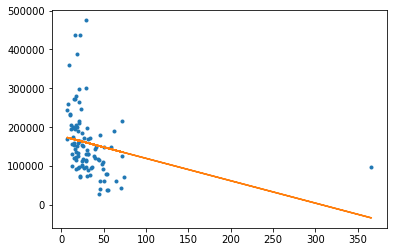

In [19]:
from matplotlib.pyplot import plot
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=sales[['CrimeRate']], y=sales['HousePrice'])

plot(
    sales['CrimeRate'], sales['HousePrice'], '.',
    sales['CrimeRate'], lr.predict(sales[['CrimeRate']]), '-')

# Remove Center City and Redo the Analysis

Center City is the one observation with an extremely high crime rate, yet house prices are not very low. This point does not follow the trend of the rest of the data very well. A question is how much including Center City is influencing our fit on the other datapoints. Let's remove this datapoint and see what happens.

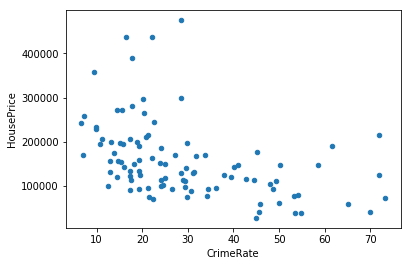

In [20]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]
sales_noCC.plot.scatter(x='CrimeRate', y='HousePrice')

And we can refit our linear regression model to the new data...

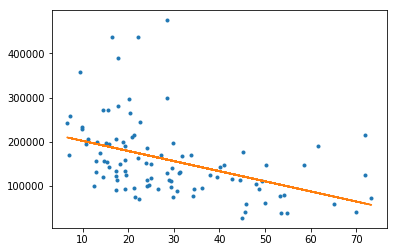

In [21]:
lr_noCC = LinearRegression()
lr_noCC.fit(X=sales_noCC[['CrimeRate']], y=sales_noCC['HousePrice'])

plot(
    sales_noCC[['CrimeRate']], sales_noCC['HousePrice'], '.',
    sales_noCC[['CrimeRate']], lr_noCC.predict(sales_noCC[['CrimeRate']]), '-')

Let's compare the coefficients of the trained models with and without Center City.

In [26]:
(lr.intercept_, lr.coef_)

(176629.40810695427, array([-576.90812768]))

In [28]:
(lr_noCC.intercept_, lr_noCC.coef_)

(225233.55183900378, array([-2288.68942995]))

### High Leverage Points:

Center city is said to be a "high leverage" point because it is **at an extreme x value where there are not other observations**. As a result, recalling the closed-form solution for simple regression, this point has the potential to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point. If a high leverage point follows the trend of the other data, this might not have much effect. On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

### Influential Observations:

An influential observation is one where **the removal of the point significantly changes the fit**. As discussed above, high leverage points are good candidates for being influential observations, but need not be. Other observations that are *not* leverage points can also be influential observations (e.g. strongly outlying i y even if x is a typical value).

# Remove high-value outlier neighborhoods and redo analysis

Based on the discussion above, a question is whether the outlying high-value towns are strongly influencing the fit. Let's remove them and see what happens...

In [31]:
sales_noHighEnd = sales_noCC[sales_noCC['HousePrice'] < 350000]

crime_model_noHighEnd = LinearRegression()
crime_model_noHighEnd.fit(
    X=sales_noHighEnd[['CrimeRate']],
    y=sales_noHighEnd['HousePrice'])

(crime_model_noHighEnd.intercept_, crime_model_noHighEnd.coef_)

(199098.85266980447, array([-1838.56264859]))

Removing the outlying high-value neighborhoods has *some* effect on the fit, but not nearly as much as our high-leverage Center City datapoint.